# EMSC Week 11 - A detailed look at the depth-age relationship for the seafloor.

We are going to work with the ETOPO1 dataset (Amante et al) which we can download from various services online when we need it. 
You can read more about the dataset here: https://ngdc.noaa.gov/mgg/global/


![color_etopo1_ice_low_400.gif](Images/color_etopo1_ice_low_400.gif)


We need some libraries to help with downloading, manipulating and plotting the data:

  - `numpy` to manipulate arrays 
  - `xarray` which extends `numpy` for data that might be too big to read all at once
  - `matplotlib` and `cartopy` for plotting data on maps

## Navigation

  - the [first notebook:EMSC2022W11.ii.ipynb](EMSC2022W11.i.ipynb)
  - the [next notebook:EMSC2022W11.iii.ipynb](EMSC2022W11.iii.ipynb)
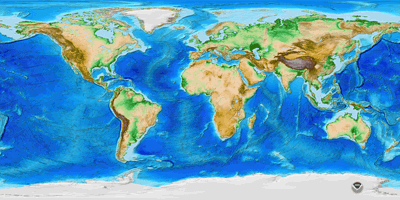

In [1]:
import numpy as np
import xarray

import matplotlib.pyplot as plt
from matplotlib import cm  # colourmaps
%matplotlib inline

In [2]:
from pydap.client import open_url
pyds = open_url('http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/etopo2.nc', protocol="dap2")
pyds.tree()

.ancillary_data/bathymetry/etopo2.nc
├──lon
├──lat
└──topo
   ├──topo
   ├──lat
   └──lon


<module 'xarray' from '/Users/lmoresi/miniforge3/envs/emsc2022/lib/python3.13/site-packages/xarray/__init__.py'>

## Navigation


  - Landing [notebook:EMSC2022W11.i.ipynb](EMSC2022W11.i.ipynb)
  - Next [notebook:EMSC2022W11.iii.ipynb](EMSC2022W11.iii.ipynb)


### References

Amante, C. “ETOPO1 1 Arc-Minute Global Relief Model: Procedures, Data Sources and Analysis.” National Geophysical Data Center, NOAA, 2009. https://doi.org/10.7289/V5C8276M.

## Read ETOPO data from a remote service

This is how we access the data - provide a url, open that url, and ask for a subset of the data (either by region or by taking every n'th value)

``` python
    etopo_dataset = "http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/ETOPO1_Bed_g_gmt4.nc"
    etopo_data = xarray.open_dataset(etopo_dataset)
    subs_data = etopo_data.sel(x=slice(left,right, 30), y=slice(bottom, top, 30))
```

Here we have requested every 30th data point. 

In [18]:
(left, bottom, right, top) = (-180, -90, 180, 90)
map_extent = ( left, right, bottom, top)


etopo_dataset = "dap2://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/etopo2.nc"
etopo_data = xarray.open_dataset(etopo_dataset, engine="pydap")


# Take every 180th point of the 1 arc minute dataset (in each axis)
subs_data = etopo_data.sel(lon=slice(left,right, 5), lat=slice(bottom, top, 5))

lons = subs_data.coords.get('lon')
lats = subs_data.coords.get('lat')
vals = subs_data['topo']

x,y = np.meshgrid(lons.data, lats.data)
height = vals.data

In [129]:
data_http = "dap4://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_1min.nc"
gebco_data = xarray.open_dataset(etopo_dataset, engine="pydap")

In [30]:
gebco_data.info()

xarray.Dataset {
dimensions:
	lon = 10800 ;
	lat = 5400 ;

variables:
	float32 lon(lon) ;
	float32 lat(lat) ;
	float32 topo(lat, lon) ;

// global attributes:
}

In [54]:
from urllib.request import urlretrieve

urlretrieve("http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_1min.nc.dds", "GEBCO_1min.nc.dds")

('GEBCO_1min.nc.dds', <http.client.HTTPMessage at 0x39b952fd0>)

In [55]:
import IPython
display(IPython.display.HTML("GEBCO_1min.nc.dds"))

In [101]:
urlretrieve("http://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_1min.nc?elevation[0:10:1080][0:10:3300]", "GEBCO_1min.nc")

HTTPError: HTTP Error 400: 

In [99]:
xarray.open_dataset("GEBCO_1min.nc")

<xarray.Dataset> Size: 29MB
Dimensions:    (lat: 1081, lon: 3301)
Coordinates:
  * lat        (lat) float64 9kB 30.0 30.02 30.03 30.05 ... 47.97 47.98 48.0
  * lon        (lon) float64 26kB -10.0 -9.983 -9.967 -9.95 ... 44.97 44.98 45.0
Data variables:
    elevation  (lat, lon) float64 29MB ...
Attributes:
    Conventions:  CF-1.0
    title:        The GEBCO One Minute Grid - a continuous terrain model for ...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The grid is largely based on the bathymetric contours conta...
    history:      This is version 2.0 of the data set, released in November 2008
    references:   Information on the data set is available from the internet:...
    comment:      The data in the GEBCO One Minute Grid should not be used fo...
    node_offset:  0
    History:      Translated to CF-1.0 Conventions by Netcdf-Java CDM (Netcdf...

In [100]:
ls -l

total 38720
-rw-r--r--@ 1 lmoresi  staff     3960 Apr  2 17:19 EMSC2022W11.i.ipynb
-rw-r--r--@ 1 lmoresi  staff  1615653 Apr  3 12:15 EMSC2022W11.ii.ipynb
-rw-r--r--  1 lmoresi  staff     5869 May 11  2024 EMSC2022W11.iii.ipynb
-rw-r--r--@ 1 lmoresi  staff     9303 Mar 17 17:08 EMSC2022W11.iv.ipynb
-rw-r--r--  1 lmoresi  staff     8083 May 13  2024 EMSC2022W11.v.ipynb
-rw-r--r--  1 lmoresi  staff     9110 May 13  2024 EMSC2022W11.vi.ipynb
-rw-r--r--@ 1 lmoresi  staff  7173860 Apr  3 12:16 GEBCO_1min.nc
-rw-r--r--@ 1 lmoresi  staff      281 Apr  3 11:54 GEBCO_1min.nc.dds
-rw-r--r--@ 1 lmoresi  staff     4638 Apr  3 11:43 GEBCO_1min.nc.info
drwxr-xr-x  8 lmoresi  staff      256 Mar 21  2023 Images/
-rw-r--r--@ 1 lmoresi  staff  9351514 Apr  2 21:26 TEST.nc
-rw-r--r--  1 lmoresi  staff  1386663 May 11  2024 TheTargetPlot.png
drwxr-xr-x  4 lmoresi  staff      128 Mar 21  2023 data/


In [123]:
import pydap
from pydap.client import open_url
url= "https://thredds.socib.es/thredds/dodsC/ancillary_data/bathymetry/MED_GEBCO_1min.nc?elevation[0:10:1080][0:10:3300]"
dataset = dataset=open_url(url, protocol="dap2")

In [128]:
dataset["elevation"].tree()

.elevation
├──elevation
├──lat
└──lon


In [112]:
lat_a = dataset['elevation']['lat'].data

In [113]:
lat_a.shape

(109,)

In [45]:
cat GEBCO_1min.nc.info

<html><head><script async src="https://www.googletagmanager.com/gtag/js?id=G-2DVXD3M3LB"></script><script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag("js", new Date());gtag("config", "G-2DVXD3M3LB");</script><title>Dataset Information</title>
<style type="text/css">
<!-- ul {list-style-type: none;} -->
</style>
</head>
<body>
<h3>Dataset Information</h3>
<table>

<tr><td align=right valign=top><b>Conventions</b>:</td>
<td align=left>CF-1.0<br></td></tr>

<tr><td align=right valign=top><b>title</b>:</td>
<td align=left>The GEBCO One Minute Grid - a continuous terrain model for oceans and land at one arc-minute intervals<br></td></tr>

<tr><td align=right valign=top><b>institution</b>:</td>
<td align=left>On behalf of the General Bathymetric Chart of the Oceans (GEBCO) the data are held at the British Oceanographic Data Centre (BODC).<br></td></tr>

<tr><td align=right valign=top><b>source</b>:</td>
<td align=left>The grid is largely based on

## Validation

Can you check to see what resolution data we have downloaded ?
(hint *the `height` data is a numpy array and has a `shape` attribute*)

Check here:

In [24]:
print("The shape of the array is ... ")

The shape of the array is ... 


and we should plot the data to see if it matches the image above and whether we need more resolution.
Does that look right ?

If the map is horribly pixelated, we might try downloading more data. Don't go mad or it will take forever. 

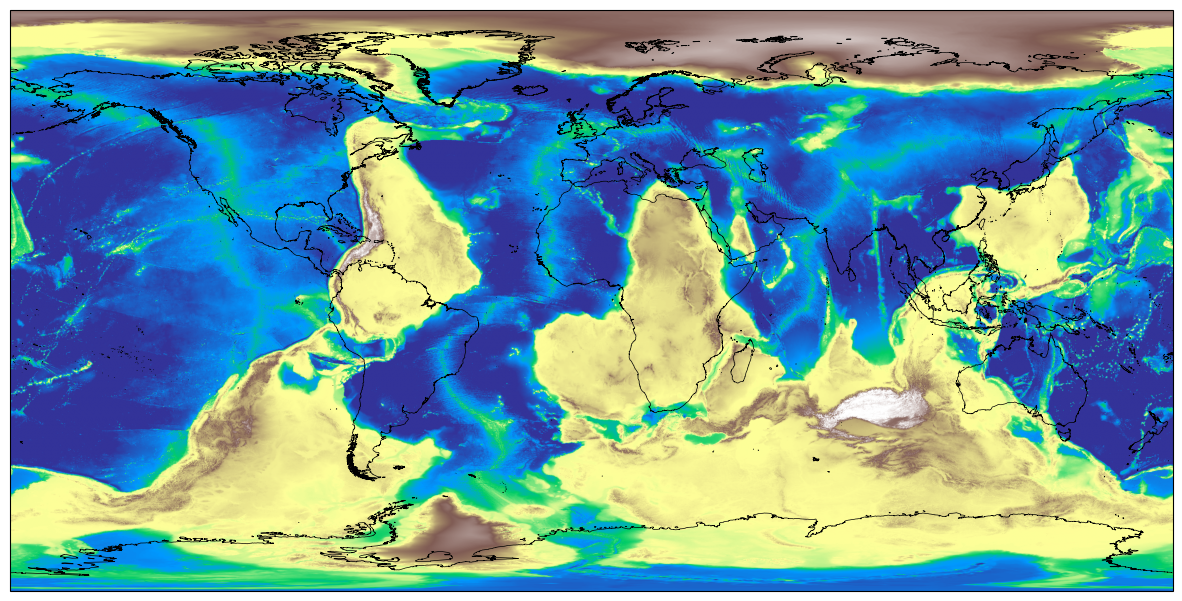

In [25]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                           edgecolor=(1.0,0.8,0.0),
                           facecolor="none")

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(map_extent)

ax.add_feature(coastline, edgecolor="black", linewidth=0.5, zorder=3)

plt.imshow(height, extent=map_extent, transform=ccrs.PlateCarree(),
           cmap='terrain',  vmin=-5000., vmax=5000.)

The map does not look quite right, does it ?

It is important to check the data that you download to make sure that:

  1. you downloaded the correct data
  2. the resolution is enough for the job at hand
  3. the dataset is complete / not corrupted

In the map, the data is obviously not exactly as we would expect. It's obviously not corrupted but it is not correctly formatted for the `imshow` command. You can fix this in one of two ways: either adjust the ordering of the dataset to match what `imshow` wants or ask `imshow` to do it for you by adding the `origin="lower"` argument.

In [ ]:
## Fixed code here

## Exercise 

Download the data at high(er) resolution and **make a nicer map** (say skip every 30 instead of 300) that's $10 \times 10$ more data points so it might take a bit longer to download / plot. 

*Note:* the purpose of this exercise is to show you some very basic ways to check the data by downloading a small sample before launching into an expensive analysis.


In [ ]:
# This is how you save it if you want to keep it
# fig.savefig("ETOPO1.png", dpi=150)